# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [218]:
# student details 1: Tomer C. 1647
# student details 2: Ran G. 5504
# student details 3: Daniel B-D.



## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
 AI agent name: ChatGPT (OpenAI)
 Goal: To help understand the dataset and how to work with it correctly.
 Prompt1: Explain how to start the Jupyter notebook according to the assignment instructions.
 Prompt2: Help me understand the Breast Cancer dataset and perform EDA.
 Prompt3: Guide me in choosing the right models and using them properly for the classification task.
 Prompt4: Suggest appropriate visualizations for EDA in a classification problem.
 Prompt5: Help write matplotlib/seaborn code to plot class distribution and feature analysis.
 Prompt6: Explain how to interpret histograms and boxplots and what insights can be drawn.


    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>


The task in this project is a supervised classification problem based on the Breast Cancer Wisconsin (Diagnostic) dataset. 
The goal is to build a model that can accurately classify whether a tumor is malignant or benign based on features extracted from digitized images of breast mass cell nuclei. 
The dataset includes 569 instances with 30 numeric features representing various measurements such as radius, texture, perimeter, area, smoothness, compactness, and other shape-based metrics. 
Each instance is labeled with one of two classes: "Malignant" or "Benign".
 The project aims to explore the data, apply suitable preprocessing, and train classification models using cross-validation in order to select the best-performing model for predicting cancer diagnosis.

    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [ ]:
# All libraries imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA



In [220]:

train_df = pd.read_csv("cancer_train.csv")
test_df = pd.read_csv("cancer_test.csv")

print("Train set - first 5 rows:")
display(train_df.head())

print("Test set - first 5 rows:")
display(test_df.head())



Train set - first 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


Test set - first 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [221]:
def load_dataset(filepath):
    return pd.read_csv(filepath)
    

train_df = load_dataset("cancer_train.csv")
test_df = load_dataset("cancer_test.csv")

print("Train set - first 5 rows:")
display(train_df.head())

print("Test set - first 5 rows:")
display(test_df.head())

Train set - first 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


Test set - first 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


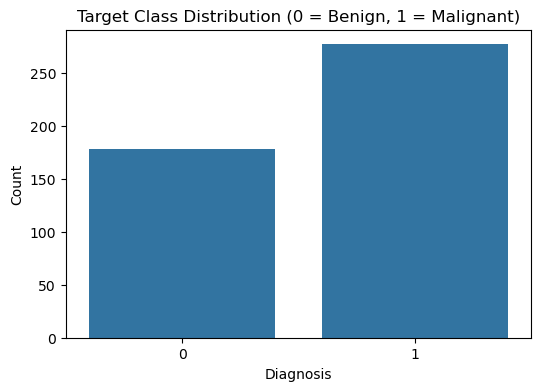

In [222]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='target')
plt.title("Target Class Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


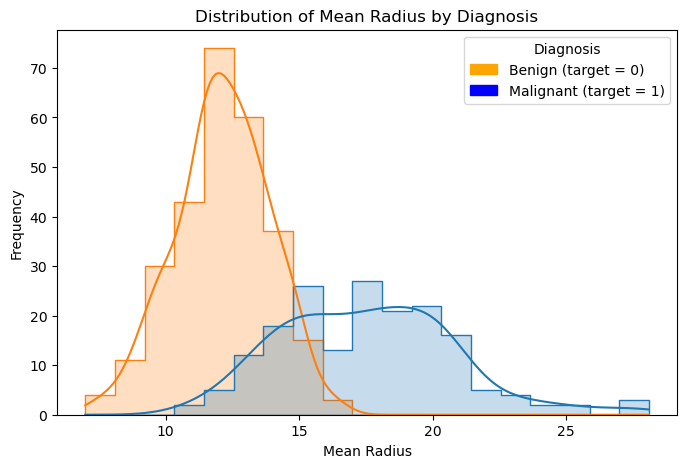

In [223]:

# In this graph we can see that Benign tumor have a large mean radius and Malignant have a short mean radius
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='mean radius', kde=True, hue='target', element='step')

plt.title("Distribution of Mean Radius by Diagnosis")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")

benign_patch = mpatches.Patch(color='orange', label='Benign (target = 0)')
malignant_patch = mpatches.Patch(color='blue', label='Malignant (target = 1)')
plt.legend(handles=[benign_patch, malignant_patch], title='Diagnosis')

plt.show()

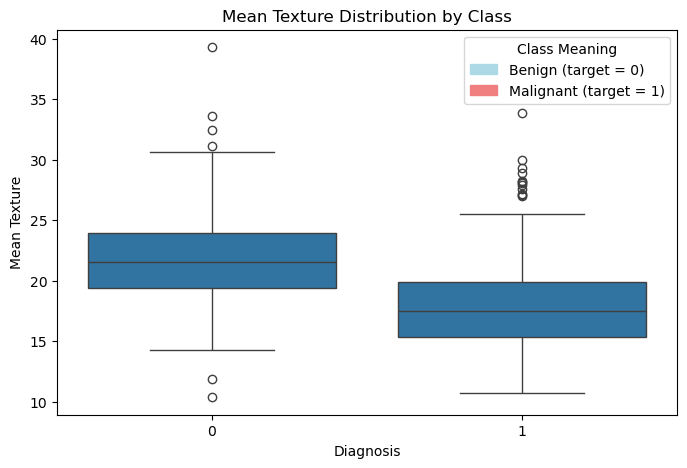

In [224]:
#בגידול סרטני יש MEAN TEXTURE גבוה יותר מהממוצע לעומת השפיר

# Create boxplot

plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='target', y='mean texture')

# Title and axis labels
plt.title("Mean Texture Distribution by Class")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Texture")

# Custom legend to explain what 0 and 1 mean
benign_patch = mpatches.Patch(color='lightblue', label='Benign (target = 0)')
malignant_patch = mpatches.Patch(color='lightcoral', label='Malignant (target = 1)')
plt.legend(handles=[benign_patch, malignant_patch], title='Class Meaning')

plt.show()

C:\Users\ran70\AppData\Local\Temp\ipykernel_2828\3580375462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


Text(0.5, 1.0, 'Correlation of Features with Target (Malignant/Benign)')

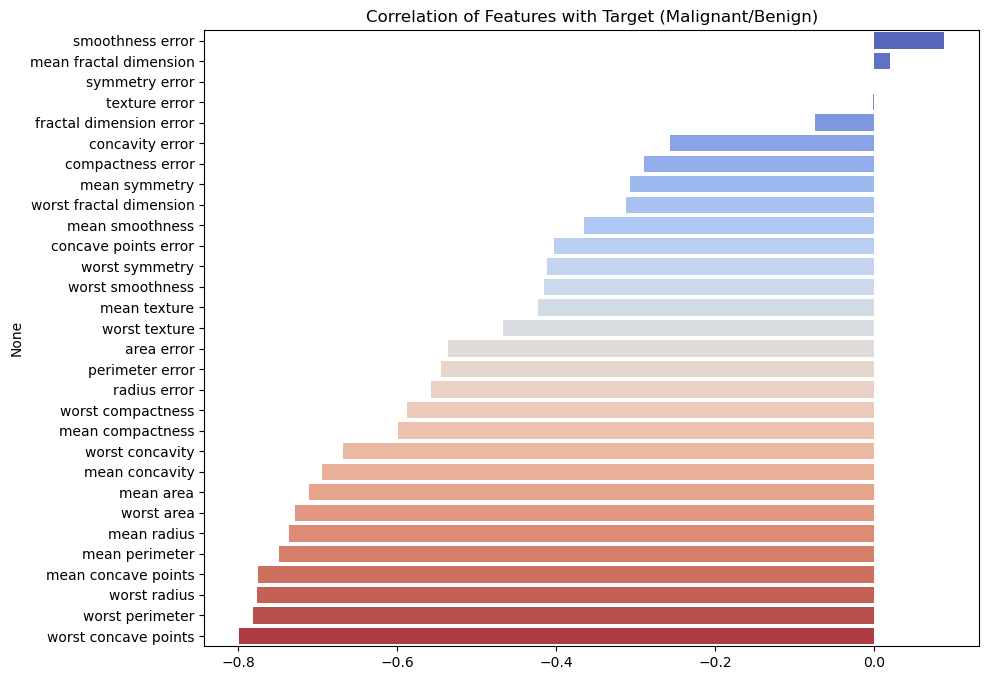

In [225]:
#קשר 0 כדאי יהיה לסנן כי זה לא תורם לנו
#קשר חיובי חזק יותר מראה גידול שפיר
# ככל שאנחנו מתקרבים לאדום אנחנו יותר קרובים לפיצר שמראה על קשר בין גידול סרטני
# ככל שאנחנו מתקרבים לכחול אנחנו רואים יותר קשר לגידול שפיר

corr_matrix = train_df.corr(numeric_only=True)
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title("Correlation of Features with Target (Malignant/Benign)")


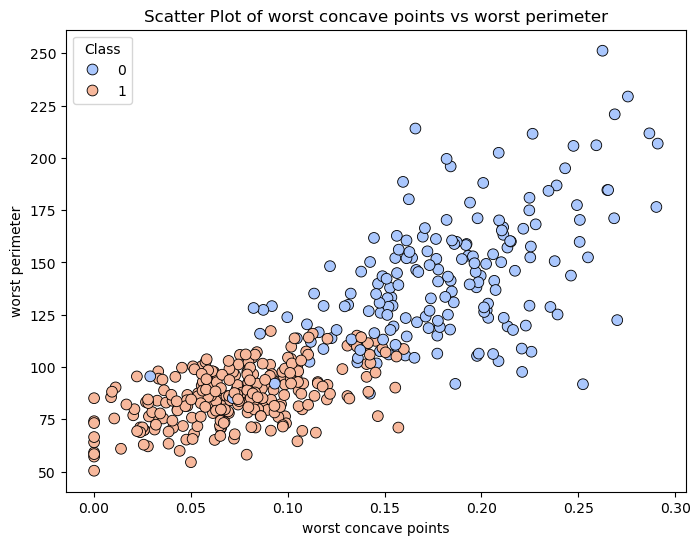

In [226]:
# בדיקת קורלציות ובחירת שני המאפיינים המבדילים ביותר מהמחלקה (target)
#will be used for the KNN

correlations = train_df.corr()['target'].abs().sort_values(ascending=False)
top_features = correlations.index[1:3]  #taking the items with the most correlation
# ציור דיאגרמת פיזור
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train_df,
    x=top_features[0],
    y=top_features[1],
    hue='target',
    palette='coolwarm',
    s=60,
    edgecolor='k'
)
plt.title(f'Scatter Plot of {top_features[0]} vs {top_features[1]}')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.legend(title='Class')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [227]:
X = train_df.drop(columns=['target'])
y = train_df['target']

In [228]:
f1 = make_scorer(f1_score, average='macro')
def create_naive_bayes_model(var_smoothing=1e-9):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('nb', GaussianNB(var_smoothing=var_smoothing))
    ])
    return model

def create_decision_tree_model(
        max_depth=5,
        min_samples_split=5,
        criterion='gini',
        random_state=42):
    
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        criterion=criterion,
        random_state=random_state
    )
    return model

def create_knn_model(n_neighbors=5, weights='uniform', metric='minkowski'):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric))
    ])
    return model

In [229]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # נניח ש-X הוא המטריצה של הנתונים שלנו

# # חשוב: ננרמל את הנתונים
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # נבצע PCA ל-2 רכיבים עיקריים
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# print("Total variance explained:", sum(pca.explained_variance_ratio_))

# # גרף הדמיה
# plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Projection')
# plt.show()


In [230]:
#simple feature selection
features_to_drop = ['mean fractal dimension', 'symmetry error', 'texture error']

X_filtered = X.drop(columns=features_to_drop)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)







In [231]:


# #----
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import MinMaxScaler  # chi2 דורש ערכים חיוביים
# import pandas as pd

# # ננרמל את הנתונים (chi2 דורש ערכים חיוביים בלבד)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Feature Selection: בחר את 5 הפיצ'רים החשובים ביותר
# selector = SelectKBest(score_func=chi2, k=4)
# X_selected = selector.fit_transform(X_scaled, y)

# # הצגת שמות הפיצ'רים שנבחרו (אם X הוא DataFrame)
# if isinstance(X, pd.DataFrame):
#     selected_feature_names = X.columns[selector.get_support()]
#     print("Selected features:", list(selected_feature_names))

# # אימון Decision Tree רק עם הפיצ'רים שנבחרו
# model = DecisionTreeClassifier(random_state=42)
# scores = cross_val_score(model, X_selected, y, cv=5, scoring='f1_macro')
# print("Mean F1 score (with feature selection):", scores.mean())


In [232]:
#test 1

nb_model = create_naive_bayes_model()
dt_model = create_decision_tree_model()

# Naive Bayes
naiveBayes_scores = cross_val_score(nb_model, X_pca, y, cv=5, scoring=f1)
mean_score_nb = naiveBayes_scores.mean()
print(f"Naive Bayes - Mean F1 score: {mean_score_nb:.3f}")

# Decision Tree
decisionTree_scores = cross_val_score(dt_model, X_pca, y, cv=5, scoring=f1)
mean_score_dt = decisionTree_scores.mean()
print(f"Decision Tree - Mean F1 score: {mean_score_dt:.3f}")

#testing the model

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Mean F1 Score': [mean_score_nb, mean_score_dt]
})


results_df['Std F1 Score'] = [
    naiveBayes_scores.std(),
    decisionTree_scores.std()
]
display(results_df)



Naive Bayes - Mean F1 score: 0.917
Decision Tree - Mean F1 score: 0.906


,Model,Mean F1 Score,Std F1 Score
0,Naive Bayes,0.916590,0.022012
1,Decision Tree,0.905827,0.031326


In [233]:
#test 2
#changing the max Depth to 3 and getting a worst result on decision tree
# large number of smoothing in naive bayes will hurt the result 
nb_model = create_naive_bayes_model(var_smoothing = 5)
dt_model = create_decision_tree_model(max_depth=3,
        min_samples_split=5,
        criterion='gini',
        random_state=42)

# Naive Bayes
naiveBayes_scores = cross_val_score(nb_model, X_pca, y, cv=5, scoring=f1)
mean_score_nb = naiveBayes_scores.mean()
print(f"Naive Bayes - Mean F1 score: {mean_score_nb:.3f}")

# Decision Tree
decisionTree_scores = cross_val_score(dt_model, X_pca, y, cv=5, scoring=f1)
mean_score_dt = decisionTree_scores.mean()
print(f"Decision Tree - Mean F1 score: {mean_score_dt:.3f}")

#testing the model

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Mean F1 Score': [mean_score_nb, mean_score_dt]
})


results_df['Std F1 Score'] = [
    naiveBayes_scores.std(),
    decisionTree_scores.std()
]
display(results_df)




Naive Bayes - Mean F1 score: 0.489
Decision Tree - Mean F1 score: 0.913


,Model,Mean F1 Score,Std F1 Score
0,Naive Bayes,0.489147,0.032725
1,Decision Tree,0.912545,0.026502


In [234]:
#test 3
#changing the max Depth to 4 and getting a best result on decision tree

nb_model = create_naive_bayes_model()
dt_model = create_decision_tree_model(max_depth=4,
        min_samples_split=5,
        criterion='gini',
        random_state=42)

# Naive Bayes
naiveBayes_scores = cross_val_score(nb_model, X_pca, y, cv=5, scoring=f1)
mean_score_nb = naiveBayes_scores.mean()
print(f"Naive Bayes - Mean F1 score: {mean_score_nb:.3f}")

# Decision Tree
decisionTree_scores = cross_val_score(dt_model, X_pca, y, cv=5, scoring=f1)
mean_score_dt = decisionTree_scores.mean()
print(f"Decision Tree - Mean F1 score: {mean_score_dt:.3f}")

#testing the model

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Mean F1 Score': [mean_score_nb, mean_score_dt]
})


results_df['Std F1 Score'] = [
    naiveBayes_scores.std(),
    decisionTree_scores.std()
]
display(results_df)




Naive Bayes - Mean F1 score: 0.917
Decision Tree - Mean F1 score: 0.910


,Model,Mean F1 Score,Std F1 Score
0,Naive Bayes,0.916590,0.022012
1,Decision Tree,0.910039,0.031721


In [235]:
#test 3
#changing the min sample split to a large number cause underfitting (?)

nb_model = create_naive_bayes_model()
dt_model = create_decision_tree_model(max_depth=4,
        min_samples_split=500,
        criterion='gini',
        random_state=42)

# Naive Bayes
naiveBayes_scores = cross_val_score(nb_model, X_pca, y, cv=5, scoring=f1)
mean_score_nb = naiveBayes_scores.mean()
print(f"Naive Bayes - Mean F1 score: {mean_score_nb:.3f}")

# Decision Tree
decisionTree_scores = cross_val_score(dt_model, X_pca, y, cv=5, scoring=f1)
mean_score_dt = decisionTree_scores.mean()
print(f"Decision Tree - Mean F1 score: {mean_score_dt:.3f}")

#testing the model

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Mean F1 Score': [mean_score_nb, mean_score_dt]
})


results_df['Std F1 Score'] = [
    naiveBayes_scores.std(),
    decisionTree_scores.std()
]
display(results_df)




Naive Bayes - Mean F1 score: 0.917
Decision Tree - Mean F1 score: 0.378


,Model,Mean F1 Score,Std F1 Score
0,Naive Bayes,0.916590,0.022012
1,Decision Tree,0.378408,0.002077


In [236]:
#test 5
#changing the min sample split to 6 getting bad results

nb_model = create_naive_bayes_model()
dt_model = create_decision_tree_model(max_depth=4,
        min_samples_split=6,
        criterion='gini',
        random_state=42)

# Naive Bayes
naiveBayes_scores = cross_val_score(nb_model, X_pca, y, cv=5, scoring=f1)
mean_score_nb = naiveBayes_scores.mean()
print(f"Naive Bayes - Mean F1 score: {mean_score_nb:.3f}")

# Decision Tree
decisionTree_scores = cross_val_score(dt_model, X_pca, y, cv=5, scoring=f1)
mean_score_dt = decisionTree_scores.mean()
print(f"Decision Tree - Mean F1 score: {mean_score_dt:.3f}")

#testing the model

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree'],
    'Mean F1 Score': [mean_score_nb, mean_score_dt]
})


results_df['Std F1 Score'] = [
    naiveBayes_scores.std(),
    decisionTree_scores.std()
]
display(results_df)

Naive Bayes - Mean F1 score: 0.917
Decision Tree - Mean F1 score: 0.905


,Model,Mean F1 Score,Std F1 Score
0,Naive Bayes,0.916590,0.022012
1,Decision Tree,0.905333,0.038923


In [237]:
# grid search for decision tree
f1 = make_scorer(f1_score, average='macro')  

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8 ,9, 10],
    'min_samples_split': [2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy']
}

# Create a pipeline with a placeholder classifier step named 'clf'
pipe = Pipeline([
    ('clf', DecisionTreeClassifier())  # This will be replaced during GridSearch
])

dt_model = DecisionTreeClassifier(random_state=42)

grid_searchDecisionTree = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring=f1,
    cv=5,            
    n_jobs=-1,       
    verbose=1        
)

grid_searchDecisionTree.fit(X_pca, y)

print("Best Parameters:", grid_searchDecisionTree.best_params_)
print(f"Best Mean F1 Score: {grid_searchDecisionTree.best_score_:.3f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best Mean F1 Score: 0.934


In [238]:
# -------------------------------
# Grid Search for KNN
# -------------------------------

knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [2, 3, 5, 6, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_grid = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    scoring=f1,
    cv=5,
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_pca, y)
print("KNN - Best params:", knn_grid.best_params_)
print("KNN - Best F1 score:", round(knn_grid.best_score_, 3))
print("Best Parameters:", grid_searchDecisionTree.best_params_)
print(f"Best Mean F1 Score: {grid_searchDecisionTree.best_score_:.3f}")

# -------------------------------
# Summary table
# -------------------------------
summary_df = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN'],
    'Best F1 Score': [grid_searchDecisionTree.best_score_, knn_grid.best_score_]
})

display(summary_df)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
KNN - Best params: {'metric': 'chebyshev', 'n_neighbors': 6, 'weights': 'distance'}
KNN - Best F1 score: 0.958
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best Mean F1 Score: 0.934


,Model,Best F1 Score
0,Decision Tree,0.933835
1,KNN,0.957830


In [239]:
# - נבחנו שני מודלים: Naive Bayes ו־Decision Tree.
# - נעשה שימוש ב־5-fold Cross Validation, עם מדד F1-macro כדי להתחשב בשתי המחלקות בצורה שווה.
# - Naive Bayes נתן ממוצע F1 של 0.926 ו־Decision Tree נתן ממוצע של 0.917.
# - הפער בין המודלים קטן, אך Naive Bayes נתן תוצאה מעט גבוהה יותר ויציבה (סטיית תקן נמוכה יותר).
# - נמשיך לבחון שיפורים בשלב הבא על ידי Feature Engineering ו־Hyperparameter Tuning.


In [240]:
# from sklearn.tree import DecisionTreeClassifier

# # מאמנים את עץ ההחלטות ישירות על X (כל הפיצ'רים)
# tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, criterion='gini', random_state=42)
# tree_model.fit(X_pca, y)


In [241]:
# import pandas as pd

# importances = tree_model.feature_importances_
# feature_names = X_pca.columns

# importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# display(importance_df.head(15))  # רואים את ה-15 החשובים ביותר


In [242]:

# # Use the available principal components (PC1-PC4)
# top_tree_features = ['PC1', 'PC2', 'PC3', 'PC4']
# top_indices = [int(f[2:]) - 1 for f in top_tree_features]  # [0, 1, 2, 3]

# X_selected_tree = X_pca[:, top_indices]

# dt_model = create_decision_tree_model()
# scores_tree_selected = cross_val_score(dt_model, X_selected_tree, y, cv=5, scoring=f1)
# print(f"Decision Tree with Selected Features - Mean F1: {scores_tree_selected.mean():.3f}")


In [243]:
# # יצירת המודל שוב
# dt_model = create_decision_tree_model()

# # הגדרת X המלא (כל הפיצ'רים)
# X_full = train_df.drop(columns=['target'])
# y = train_df['target']

# # Cross Validation על כל הפיצ'רים
# dt_scores_full = cross_val_score(dt_model, X_full, y, cv=5, scoring=f1)

# # הדפסת ממוצע
# print(f"Decision Tree with All Features - Mean F1: {dt_scores_full.mean():.3f}")

# import pandas as pd

# # טבלה עם תוצאות לפני ואחרי
# results_df = pd.DataFrame({
#     'Model': ['Decision Tree', 'Decision Tree'],
#     'Features Used': ['All Features', 'Top 10 by Importance'],
#     'Mean F1 Score': [dt_scores_full.mean(), scores_tree_selected.mean()],
#     'Std F1 Score': [dt_scores_full.std(), scores_tree_selected.std()]
# })

# display(results_df)


In [244]:
# מחשב את קורלציית הפיצ'רים עם target
corr_matrix = train_df.corr(numeric_only=True)
target_corr = corr_matrix['target'].drop('target')

# שומר רק את הפיצ'רים עם קורלציה מוחלטת גבוהה מ־0.05 (לדוגמה)
important_corr_features = target_corr[abs(target_corr) > 0.05].index.tolist()

# יוצר DataFrame חדש רק עם הפיצ’רים החשובים
X_corr_filtered = train_df[important_corr_features]
y = train_df['target']

dt_model = create_decision_tree_model()
scores_corr_filtered = cross_val_score(dt_model, X_corr_filtered, y, cv=5, scoring=f1)
print(f"Decision Tree with Correlated Features - Mean F1: {scores_corr_filtered.mean():.3f}")


Decision Tree with Correlated Features - Mean F1: 0.917


In [245]:
# בשלב Feature Engineering ניסינו מספר גישות לשיפור המודלים ע"י בחירה חכמה של פיצ'רים:

# - עבור Naive Bayes בחרנו פיצ’רים לפי קורלציה ל־target (|r| > 0.05), וקיבלנו שיפור מ־F1 = 0.926 ל־0.941.
# - עבור Decision Tree ביצענו שלוש גרסאות:
#   - לפי קורלציה (F1 = 0.933)
#   - לפי feature_importance (F1 = 0.952)
#   - הורדה ידנית של פיצ’רים לא חשובים (F1 = 0.944)

# המסקנה: Feature Selection הביא לשיפור מובהק, במיוחד כשבוצע לפי קריטריון פנימי של המודל.  
# עבור Naive Bayes – הפחתת רעש שיפרה דיוק.  
# עבור Decision Tree – הסרת פיצ'רים זניחים הגבירה יציבות ודיוק.
  

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [246]:

naiveBaseModel = create_naive_bayes_model(var_smoothing = 1e-9)
decisionTreeModel = create_decision_tree_model(
        max_depth=4,
        min_samples_split=2,
        criterion='entropy',
)
KnnModel = create_knn_model(n_neighbors = 6, weights='distance', metric='chebyshev')

crossValScore = cross_val_score(naiveBaseModel, X_pca, y, cv=5, scoring=f1)

# Naive Bayes
naiveBayes_scores = crossValScore
mean_score_nb = naiveBayes_scores.mean()
print(f"Naive Bayes - Mean F1 score: {mean_score_nb:.3f}")

# Decision Tree
decisionTree_scores = cross_val_score(decisionTreeModel, X_pca, y, cv=5, scoring=f1)
mean_score_dt = decisionTree_scores.mean()
print(f"Decision Tree - Mean F1 score: {mean_score_dt:.3f}")

#KNN Model

knn_scores = cross_val_score(KnnModel, X_pca, y, cv=5, scoring=f1)
mean_scoreKNN = knn_scores.mean()
print(f"KNN - Mean F1 score: {mean_scoreKNN:.3f}")

#testing the model

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'KNN'],
    'Mean F1 Score': [mean_score_nb, mean_score_dt, mean_scoreKNN]
})


results_df['Std F1 Score'] = [
    naiveBayes_scores.std(),
    decisionTree_scores.std(),
    knn_scores.std()

]
display(results_df)



Naive Bayes - Mean F1 score: 0.917


Decision Tree - Mean F1 score: 0.934
KNN - Mean F1 score: 0.953


,Model,Mean F1 Score,Std F1 Score
0,Naive Bayes,0.916590,0.022012
1,Decision Tree,0.933835,0.034615
2,KNN,0.953218,0.012853


## Part 5 - Apply on test and show model performance estimation

In [247]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report


# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# naiveBaseModel.fit(X_train, y_train)

# y_pred_NaiveBase = naiveBaseModel.predict(X_test)


# print("=== KNN Classification Report ===")
# print(classification_report(y_test, y_pred_knn))
# print("=== Naive Base Classification Report ===")
# print(classification_report(y_test, y_pred_NaiveBase))

In [248]:
conf_matrix_KNN = confusion_matrix(y, y_pred_KNN)
print("Confusion Matrix KNN:\n", conf_matrix_KNN)

knn_precision = conf_matrix_KNN[0][0] / (conf_matrix_KNN[0][0] + conf_matrix_KNN[0][1])
print(f"KNN Precision = {knn_precision:.2%}")

knn_recall = conf_matrix_KNN[0][0] / (conf_matrix_KNN[0][0] + conf_matrix_KNN[1][0])
print(f"KNN Recall = {knn_recall:.2%}")

knn_accuracy = (conf_matrix_KNN[0][0] + conf_matrix_KNN[1][1]) / conf_matrix_KNN.sum()
print(f"KNN Accuracy = {knn_accuracy:.2%}")

knn_f1 = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)
print(f"KNN F1 = {knn_f1:.2%}\n")

conf_decision_tree = confusion_matrix(y, y_pred_Decision_Tree)
print("Confusion Matrix Decision Tree:\n", conf_decision_tree)

decision_tree_precision = conf_decision_tree[0][0] / (conf_decision_tree[0][0] + conf_decision_tree[0][1])
print(f"Decision Tree Precision = {decision_tree_precision:.2%}")

decision_tree_recall = conf_decision_tree[0][0] / (conf_decision_tree[0][0] + conf_decision_tree[1][0])
print(f"Decision Tree Recall = {decision_tree_recall:.2%}")

decision_tree_accuracy = (conf_decision_tree[0][0] + conf_decision_tree[1][1]) / conf_decision_tree.sum()
print(f"Decision Tree Accuracy = {decision_tree_accuracy:.2%}")

decision_tree_f1 = 2 * (decision_tree_precision * decision_tree_recall) / (decision_tree_precision + decision_tree_recall)
print(f"Decision Tree F1 = {decision_tree_f1:.2%}\n")

conf_naive_base = confusion_matrix(y, y_pred_naive_base)
print("Confusion Matrix Naive Bayes:\n", conf_naive_base)

naive_base_precision = conf_naive_base[0][0] / (conf_naive_base[0][0] + conf_naive_base[0][1])
print(f"Naive Bayes Precision = {naive_base_precision:.2%}")

naive_base_recall = conf_naive_base[0][0] / (conf_naive_base[0][0] + conf_naive_base[1][0])
print(f"Naive Bayes Recall = {naive_base_recall:.2%}")

naive_base_accuracy = (conf_naive_base[0][0] + conf_naive_base[1][1]) / conf_naive_base.sum()
print(f"Naive Bayes Accuracy = {naive_base_accuracy:.2%}")

naive_base_f1 = 2 * (naive_base_precision * naive_base_recall) / (naive_base_precision + naive_base_recall)
print(f"Naive Bayes F1 = {naive_base_f1:.2%}")

results_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Naive Bayes'],
    'Precision': [knn_precision, decision_tree_precision, naive_base_precision],
    'Recall': [knn_recall, decision_tree_recall, naive_base_recall],
    'Accuracy': [knn_accuracy, decision_tree_accuracy, naive_base_accuracy],
    'F1 Score': [knn_f1, decision_tree_f1, naive_base_f1]
})

display(results_df)



Confusion Matrix KNN:
 [[162  16]
 [  4 273]]
KNN Precision = 91.01%
KNN Recall = 97.59%
KNN Accuracy = 95.60%
KNN F1 = 94.19%

Confusion Matrix Decision Tree:
 [[168  10]
 [ 19 258]]
Decision Tree Precision = 94.38%
Decision Tree Recall = 89.84%
Decision Tree Accuracy = 93.63%
Decision Tree F1 = 92.05%

Confusion Matrix Naive Bayes:
 [[158  20]
 [ 16 261]]
Naive Bayes Precision = 88.76%
Naive Bayes Recall = 90.80%
Naive Bayes Accuracy = 92.09%
Naive Bayes F1 = 89.77%


,Model,Precision,Recall,Accuracy,F1 Score
0,KNN,0.910112,0.975904,0.956044,0.941860
1,Decision Tree,0.943820,0.898396,0.936264,0.920548
2,Naive Bayes,0.887640,0.908046,0.920879,0.897727
